# Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Initilizing Parameters

In [4]:
p = [0.65, 0.35]
m_01 = np.array([3, 0])
c_01 = np.array([[2, 0], [0, 1]])
m_02 = np.array([0, 3])
c_02 = np.array([[1, 0], [0, 2]])
m_1 = np.array([2, 2])
c_1 = np.array([[1, 0], [0, 1]])
w1 = 0.5
w2 = w1


# Generating Samples
The class priors are $P(L=0)=0.65$ and $P(L=1)=0.35$. The class class-conditional pdfs are $p(\mathbf{x} \mid L=0)=w_{1} g\left(\mathbf{x} \mid \mathbf{m}_{01}, \mathbf{C}_{01}\right)+w_{2} g\left(\mathbf{x} \mid \mathbf{m}_{02}, \mathbf{C}_{02}\right)$ and $p(\mathbf{x} \mid L=1)=g\left(\mathbf{x} \mid \mathbf{m}_{1}, \mathbf{C}_{1}\right)$, where $g(\mathbf{x} \mid \mathbf{m}, \mathbf{C})$ is a multivariate Gaussian probability density function with mean vector $\mathbf{m}$ and covariance matrix C. The parameters of the class-conditional Gaussian pdfs are: $w_{1}=w_{2}=1 / 2$

In [5]:
sample_size = 10000
labels = np.random.choice([0, 1], sample_size, p)
samples = np.zeros((2, sample_size))
for i in range(sample_size):
    if(labels[i]):
        if(np.random.choice([0, 1])):
            samples[:, i] = np.random.multivariate_normal(m_01, c_01)
        else:
            samples[:, i] = np.random.multivariate_normal(m_02, c_02)
    else:
        samples[:, i] = (np.random.multivariate_normal(m_1, c_1))

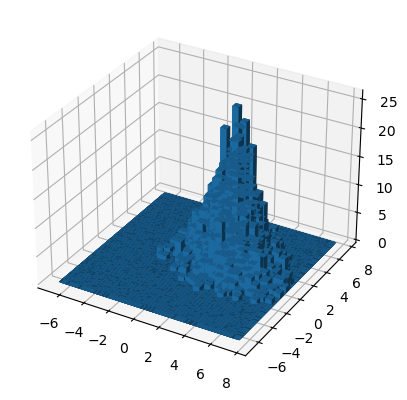

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(samples[0], samples[1], bins=100, range=[[-7, 7], [-7, 7]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Classifier

In [ ]:
def guass_mul_prob(x, m, c):
    return np.exp(-0.5 * (x - m).T @ np.linalg.inv(c) @ (x - m)) / np.sqrt((2 * np.pi) ** 2 * np.linalg.det(c))

def classifier(x, threshold, m_01, c_01, m_02, c_02, m_1, c_1):
    likelihood_ratio = guass_mul_prob(x, m_1, c_1) / (w1 * guass_mul_prob(x, m_01, c_01) + w2 * guass_mul_prob(x, m_02, c_02))
    if(likelihood_ratio < threshold):
        return 1
    else:
        return 0


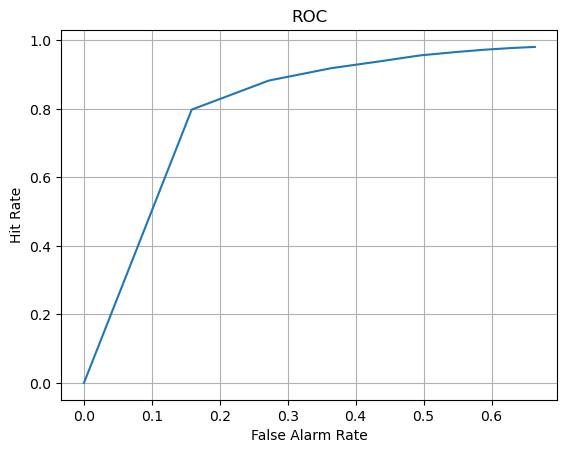

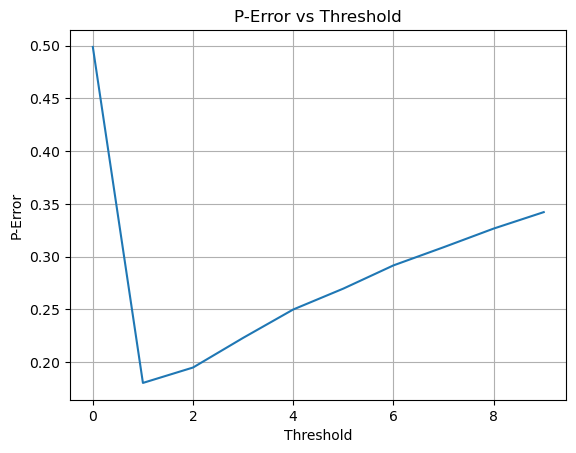

In [ ]:
thresholds = np.arange(0, 10, 1)
results = np.zeros(sample_size)
tp = np.zeros(len(thresholds))
fp = np.zeros(len(thresholds))
fn = np.zeros(len(thresholds))
for t in range(len(thresholds)):
    for i in range(sample_size):
        results[i] = classifier(samples[:,i], thresholds[t], m_01, c_01, m_02, c_02, m_1, c_1)
        tp[t] += (results[i] == labels[i]) and (labels[i] == 1)
        fp[t] += (results[i] != labels[i]) and (labels[i] == 0)
        fn[t] += (results[i] != labels[i]) and (labels[i] == 1)
tp_rate = tp / np.sum(labels == 1)
fp_rate = fp / np.sum(labels == 0)
plt.plot(fp_rate, tp_rate)
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.title('ROC')
plt.grid()
plt.show()
# calculate the probability of error
p_error = (fn + fp) / sample_size
plt.plot(thresholds, p_error)
plt.xlabel('Threshold')
plt.ylabel('P-Error')
plt.title('P-Error vs Threshold')
plt.grid()
plt.show()


## Part B

In [ ]:
w0_class = []
w1_class = []
for i in range(sample_size):
    if labels[i] == 0:
        w0_class.append(samples[:, i])
    else:
        w1_class.append(samples[:, i])
w0_class = np.array(w0_class)
w1_class = np.array(w1_class)
m_est_0 = np.mean(w0_class, axis=0)
m_est_1 = np.mean(w1_class, axis=0)
s0 = np.cov(np.transpose(w0_class))
s1 = np.cov(np.transpose(w0_class))
sw = s0 + s1
w_opt = np.matmul(np.linalg.inv(sw), m_est_0 - m_est_1)
print(w_opt)
proj_samples = np.matmul(w_opt, samples)
proj_m_est_0 = np.matmul(w_opt, m_est_0)
proj_m_est_1 = np.matmul(w_opt, m_est_1)
proj_s0 = np.matmul(np.matmul(w_opt, s0), w_opt)
proj_s1 = np.matmul(np.matmul(w_opt, s1), w_opt)

[0.26213096 0.22328133]


In [ ]:
def guass_prob(x, m_1, c_1):
    return 1/np.sqrt(2 * np.pi * c_1**2) * np.exp(-0.5 * np.power((x - m_1), 2) / c_1**2)
def classifier(x, threshold, m_0, c_0, m_1, c_1):
    likelihood_ratio = guass_prob(x, m_1, c_1) / guass_prob(x, m_0, c_0)
    if(likelihood_ratio > threshold):
        return 1
    else:
        return 0

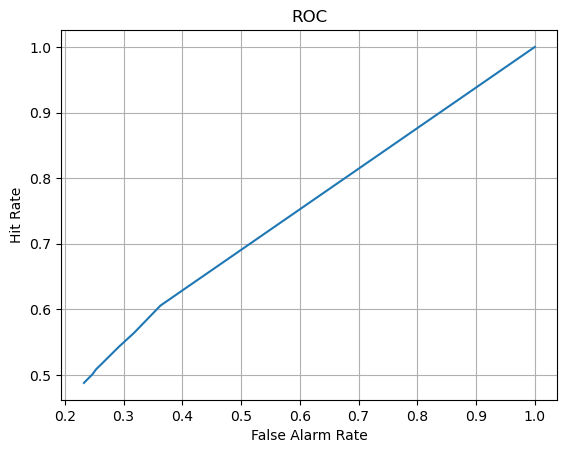

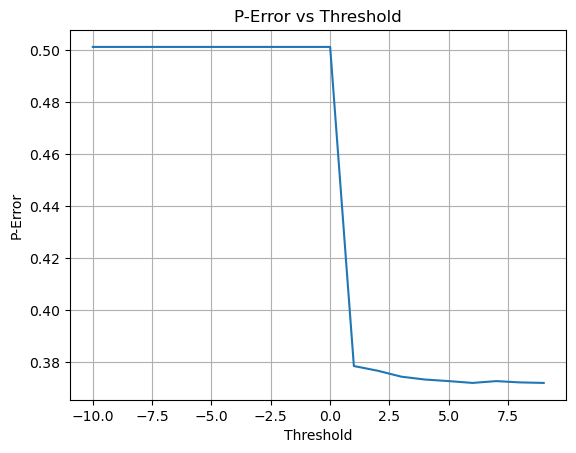

In [ ]:
thresholds = np.arange(-10, 10, 1)
results = np.zeros(sample_size)
tp = np.zeros(len(thresholds))
fp = np.zeros(len(thresholds))
fn = np.zeros(len(thresholds))
for t in range(len(thresholds)):
    for i in range(sample_size):
        results[i] = classifier(proj_samples[i], thresholds[t], proj_m_est_0, proj_s0, proj_m_est_1, proj_s1)
        tp[t] += (results[i] == labels[i]) and (labels[i] == 1)
        fp[t] += (results[i] != labels[i]) and (labels[i] == 0)
        fn[t] += (results[i] != labels[i]) and (labels[i] == 1)
# claculate p-error and plot

# plot ROC curve
tp_rate = tp / np.sum(labels == 1)
fp_rate = fp / np.sum(labels == 0)
plt.plot(fp_rate, tp_rate)
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.title('ROC')
plt.grid()
plt.show()

p_error = (fn + fp) / sample_size
plt.plot(thresholds, p_error)
plt.xlabel('Threshold')
plt.ylabel('P-Error')
plt.title('P-Error vs Threshold')
plt.grid()
plt.show()